In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Energy(lat,J=1):
    #J=1
    #sigma = spins, indices refer to spin in array
    return sum([-J*lat[(i+1)]*lat[i] for i in range(0,len(lat)-1)])

N=10 #atoms
lattice = 2*np.random.randint(2,size=(1,N))[0]-1   #1 for up,-1 for down

E_curr = Energy(lattice)

#getting spectrum of energies for 1D lattice
config = np.array([1]*N)
Emin = float(Energy(config))
config[::2] = -1 #now make them every other for max energy
Emax = float(Energy(config))
Eflip = Energy(np.array([-1]+[1]*(N-1)))
dE = Eflip-Emin
E_spectrum = np.arange(Emin,Emax+dE,dE)
print(E_spectrum)
#density of states has form of energy spectrum!
log_g = np.zeros_like(E_spectrum) #would be all 0, starting g at 1

#initialize histogram -> what will be judged if flat
histogram = np.zeros_like(E_spectrum)

#modification factor
f = 1 #ln(e) = 1
tot = 0
while f>10**-8:
    #chooose random energy
    proposed_bit = np.random.randint(0,N)
    lattice[proposed_bit] = lattice[proposed_bit]*-1
    E_proposed = Energy(lattice)
    
    #what energy value is the current and proposed
    ind_E_curr = np.where(E_spectrum==E_curr)[0][0]
    ind_E_proposed = np.where(E_spectrum==E_proposed)[0][0]
    
    #calculate the density of states
    g_curr = log_g[ind_E_curr]
    g_proposed = log_g[ind_E_proposed]
    
    #calc prob of acceptance
    prob_acceptance = np.exp(g_curr - g_proposed) #g_curr/g_proposed
    r = np.random.uniform(0,1)
    if r < np.minimum(1,prob_acceptance):
        E_curr = E_proposed
        ind_E_curr = ind_E_proposed
        
    else:
        #reject reflip spin
        lattice[proposed_bit] = lattice[proposed_bit]*-1
    
    histogram[ind_E_curr] += 1
    log_g[ind_E_curr] += f #add f because working w natural log, log(g*f) = log(g)+log(f)
    if np.min(histogram) > np.mean(histogram)*0.85:
        #print('success')
        print(sum(histogram))
        tot+=sum(histogram)
        histogram = np.zeros_like(E_spectrum)
        f *= 0.5
        
        

[-9. -7. -5. -3. -1.  1.  3.  5.  7.  9.]
455.0
608.0
433.0
1608.0
2006.0
1926.0
2079.0
3413.0
7693.0
22534.0
8335.0
7287.0
6988.0
5228.0
25074.0
5014.0
4270.0
7015.0
6907.0
3975.0
5056.0
11252.0
9401.0
1655.0
17334.0
3893.0
6598.0


178037.0
1024
1143.4807283156667


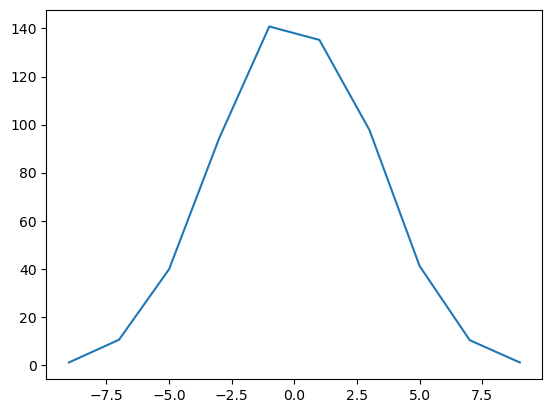

In [13]:
import itertools
print(tot)

plt.plot(E_spectrum,np.exp(log_g-log_g[0]))


In [44]:
def Energy2(lat,J=1):
    #J=1
    #sigma = spins, indices refer to spin in array
    return sum([-J*lat[(i-1)]*lat[i] for i in range(0,len(lat))])/2
N=10
config = np.array([1]*N)
Emin = float(Energy2(config))
config[::2] = -1 #now make them every other for max energy
Emax = float(Energy2(config))
Eflip = Energy2(np.array([-1]+[1]*(N-1)))
dE = Eflip-Emin
#E_spectrum = np.arange(Emin,Emax+dE,dE)

print(Emin)
print(Emax)
print(Eflip)
print(dE)

test1 = np.ones(N)
print(Energy2(test1))
test1[0] = -1
print(Energy2(test1))

-5.0
5.0
-3.0
2.0
-5.0
-3.0


In [127]:
#testing energy spectrum

def Energy(lat,J=1):
    #J=1
    #sigma = spins, indices refer to spin in array
    return sum([-J*lat[(i-1)]*lat[i] for i in range(0,len(lat))])

n = 89
test = np.ones(n)
print(Energy(test))
test[0] = -1
test[4] = -1
print(Energy(test))


-89.0
-81.0
